## Inverse Sampling

One of the most widely used sampling methods is the inverse sampling. To sample from a distribution $p(y)$, we first sample a random variable $z$ from the uniform distribution $\mathcal{U}(0,1)$, then transform $z$ to $Y$ using $Y=h^{-1}(z)$, where 

$$h(y)=\int_{-\infty}^yp(\hat{y})d\hat{y}$$

Then $Y\sim p(y)$.

\begin{proof}

If $z\sim \mathcal{U}(0,1)$, we have

\begin{align*}
h(y)&=\mathbb{P}(z\leq h(y))\\
&=\mathbb{P}(h^{-1}(z)\leq y)\\
&=\mathbb{P}(Y\leq y)
\end{align*}

Therefore, $h(y)$ is the CDF of $Y$.

\end{proof}

Usually this method does not work well because 

1.It is hard to get CDF $h(y)$.

2.Even when we get $h(y)$, it may difficult to obtain $h^{-1}(\cdot)$.

## Rejection Sampling

Sometimes directly drawing from the desired complicated distribution $p(z)$ is hard, but the value $q(z)$ can be sampled. We want to draw samples from $q(z)$ then control the rejection rate to obtain $p(z)$.

The procedures of rejection sampling are described as follows: we first introduce a proposal distribution $q(z)$, from which we can readily draw samples. We next introduce a smallest constant $k$ satisfies $\forall z,kq(z)\geq p(z)$ . To sample from $p(z)$, we generate a number $z_0$ from $q(z)$, then we draw a number $u_0$ from $\mathcal{U}(0,kq(z_0))$. If $u_0>p(z_0)$, we reject the sample, otherwise retain $z = z_0$. Then $z\sim p(z)$.

\begin{proof}

The probability of accept $z_0\sim q(z)$ conditioned on $z_0$ is given by

$$\mathbb{P}(\text{accept }z\mid z=z_0 )=\frac{p(z_0)}{kq(z_0)}$$

The probability of $z=z_0$ conditioned on all samples that is accepted is

\begin{align*}
\mathbb{P}(z=z_0\mid \text{accept } z)&=\frac{\mathbb{P}(z=z_0,\text{accept } z)}{\mathbb{P}(\text{accept } z)}\\
&=\frac{\mathbb{P}(\text{accept } z\mid z=z_0)\mathbb{P}(z=z_0)}{\int_z\mathbb{P}(z,\text{accept } z)}\\
&=\frac{\frac{p(z_0)}{kq(z_0)}q(z_0)}{\int_z\frac{p(z)}{kq(z)}q(z)}\\
&=p(z_0)
\end{align*}

\end{proof}

The drawback of rejection sampling is that before we get enough samples that we desire, we usually get many useless samples, it is very inefficient.

## Importance sampling

Importance sampling is based on the use of proposal distribution $q(z)$ from which it is easy to draw samples.

\begin{theorem}[Law of Large Numbers]

When $L\rightarrow\infty$, sample mean will converge to the population mean.

$$\mathbb{P}\Big(\big|{\frac{1}{L}\sum_{l=1}^Lf(z_i)-\mathbb{E}[f(z)]}\big|>\epsilon\Big)\rightarrow 0$$

\end{theorem}

According to the Law of Large Numbers, one can express the expectation in the form of a finite sum over samples from $q(z)$.

\begin{align*}
\mathbb{E}[f(z)]&=\int f(z)p(z)dz\\
&=\int f(z)\frac{p(z)}{q(z)}q(z)dz\\
&=\mathbb{E}_q[f(z)\frac{p(z)}{q(z)}]\\
&\approx \frac{1}{L}\sum_{l=1}^Lf(z_l)\frac{p(z_l)}{q(z_l)}
\end{align*}


## Markov Chain Monte Carlo

**Metropolis-Hastings algorithm**

1.Initialize $X_0$ arbitrarily.

2.To generate $X_{i+1}$:

  (1)Generate a proposal value $Y\sim q(y\mid X_i)$.
  
  (2)Evaluate accept rate $r(X_i,Y)$ that
  
  $$r(x,y)=\min\{\frac{f(y)q(x\mid y)}{f(x)q(y\mid x)},1\}.$$
  
  (3)Set $X_{i+1}=Y$ with probability $r$, and hold $X_{i+1}=X_i$ with probability $1-r$.  

\begin{proof}
If $r(x,y)\leq 1$, then
$$\frac{f(x)q(y\mid x)}{f(y)q(x\mid y)}\geq 1.$$
Therefore $r(y,x)=1.$

If $r(y,x)\leq 1$, then 
$$\frac{f(y)q(x\mid y)}{f(x)q(y\mid x)}\geq 1.$$
Therefore $r(x,y)=1.$

Suppose $r(x,y)\leq 1$ and $r(y,x)=1$.

$$r(x,y)=\frac{f(y)q(x\mid y)}{f(x)q(y\mid x)}$$

$$f(x)q(y\mid x)r(x,y)=f(y)q(x\mid y)r(y,x)$$

$$f(x)T(y\mid x)=f(y)T(x\mid y)$$

The equation above is the detailed balance condition.
\end{proof}


In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
def MCMC(size, var, target):
    y = []
    y.append(2)
    for i in range(1,size):
        q = np.random.normal(y[i-1], var, 1)
        alpha = target(q)/target(y[i-1])
        if alpha >= 1:
            y.append(q)
        elif alpha > np.random.uniform(0,1):
            y.append(q)
        else:
            y.append(y[i-1])
    return np.array(y)

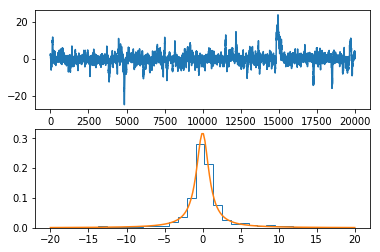

In [2]:
def target(x):
    return 1/(np.pi*(1+x**2))
y = MCMC(20000,1,target)
fig = plt.figure()
ax_1 = fig.add_subplot(2,1,1)
ax_2 = fig.add_subplot(2,1,2)
ax_1.plot(y)
#plt.hist(np.random.normal(0,1,9000),normed = True, bins = 15, histtype="step")
ax_2.hist(y[15000:],normed = True,bins = 25, histtype="step")
#plt.hist(stats.cau(0,1).rvs(size=8000),normed = True,bins = 5, histtype="step")
ax_2.plot(np.linspace(-20,20,200),np.vectorize(target)(np.linspace(-20,20,200)))

## Gibbs Sampling

If we can generate samples from full conditional distribution $f(\theta_i\mid \theta_{-i},x)$, we can draw samples from joint distribuions.
$$\theta_1^{i+1}\sim f(\theta_1\mid \theta_{-1}^{i})$$

$$\theta_2^{i+1}\sim f(\theta_2\mid \theta_1^{i+1},\theta_{-1,-2}^{i})$$

Repeat

Then we get samples $(\theta_1^{i+1},\theta_2^{i+1},\cdots,\theta_n^{i+1})$ from $f(\theta_1,\theta_2,\cdots,\theta_n\mid x)$.

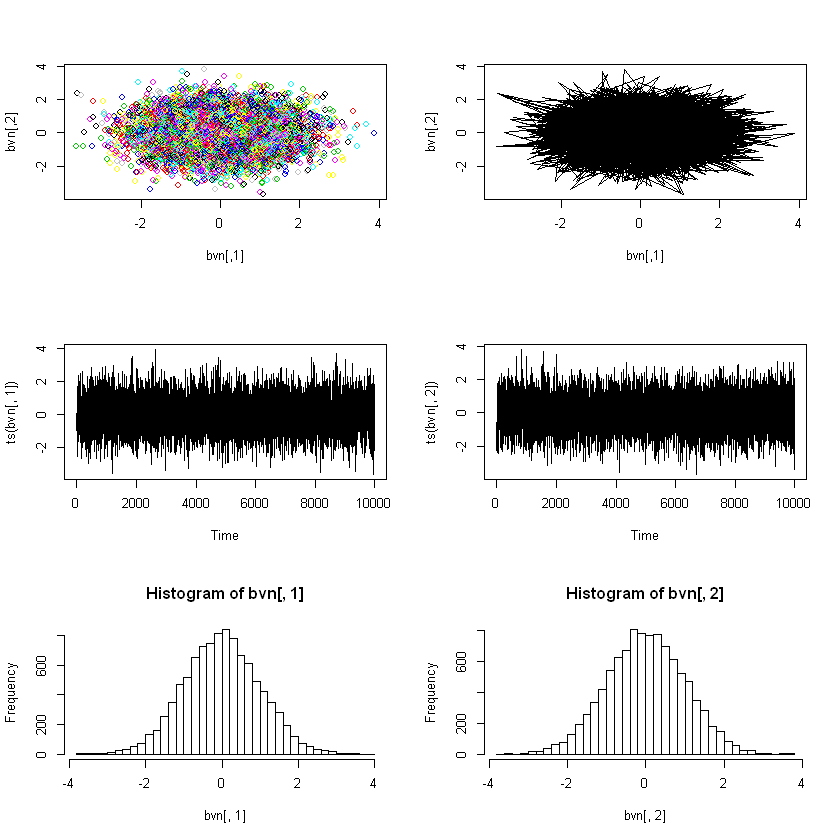

In [1]:
gibbs<-function(n, rho){
    mat <- matrix(ncol = 2, nrow = n)
    x <- 0
    y <- 0
    for (i in 2:n){
        x <- rnorm(1, rho * y, sqrt(1 - rho^2))
        y <- rnorm(1, rho * x, sqrt(1 - rho^2))
        mat[i,] <- c(x, y)
    }
    mat
}

bvn <- gibbs(10000,0)
par(mfrow=c(3,2))
plot(bvn,col=1:10000)
plot(bvn,type="l")
plot(ts(bvn[,1]))
plot(ts(bvn[,2]))
hist(bvn[,1],40)
hist(bvn[,2],40)
par(mfrow=c(1,1))